In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/silkieMoth/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Mean Fish Count by Region from 1886 - 1997'}, xlabel='Region', ylabel='Mean Yearly Fish Count (thousands)'>

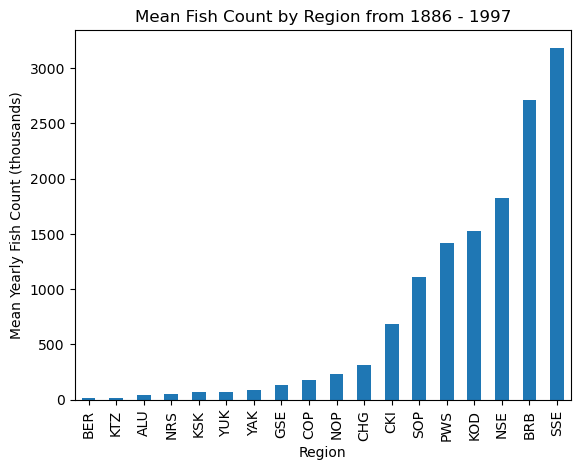

In [2]:
# FINAL CODE

import pandas as pd
import numpy as np
import warnings as warning
import seaborn as sns

# Read in salmon catch data
catch_data = pd.read_csv("data/salmon_data.csv")

# Remove unnecessary columns
catch_data = catch_data.drop(columns = 'notesRegCode')

# Change stray 'I' to '1'
catch_data.loc[[400], ['Catch']] = '1'

# Change 'Catch' col to type 'int64'
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# New df with mean salmon per region
avg_region = (catch_data.groupby('Region')
              .mean().drop(columns = 'Year')
              .sort_values('Catch'))


avg_region.plot.bar(use_index = True, 
                    y = 'Catch',
                    title = "Mean Fish Count by Region from 1886 - 1997",
                    ylabel = "Mean Yearly Fish Count (thousands)",
                    legend = False)

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
catch_data = pd.read_csv("data/salmon_data.csv")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.
["Columns", 
 catch_data.columns, # All columns in catch_data
 "Region Data", 
 catch_data["Region"].value_counts(), # Count of unique values in 'Region' 
 "Species Data", 
 catch_data["Species"].value_counts(), # Count of unique values in 'Species'
 "NAs?", 
 catch_data.isna().sum()]

['Columns',
 Index(['Region', 'Year', 'notesRegCode', 'Species', 'Catch'], dtype='object'),
 'Region Data',
 KOD    580
 NSE    575
 BRB    570
 SSE    560
 CHG    550
 PWS    545
 CKI    525
 BER    510
 YAK    480
 COP    470
 NOP    460
 SOP    450
 ALU    435
 KSK    425
 KTZ    415
 GSE    410
 YUK    395
 NRS    185
 Name: Region, dtype: int64,
 'Species Data',
 Chinook    1708
 Sockeye    1708
 Coho       1708
 Pink       1708
 Chum       1708
 Name: Species, dtype: int64,
 'NAs?',
 Region             0
 Year               0
 notesRegCode    7125
 Species            0
 Catch              0
 dtype: int64]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

Regularly I find that the most important information when doing your initial analysis is specific information on the categorical variables, so I got all unique values by frequency of values for those variables. Also important is where the NAs are, as NA values can frequently cause problems when cleaning.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
try: 
    catch_data = catch_data.drop(columns = 'notesRegCode') # probably remove try/except later
except:
    warning.warn("notesRegCode already removed")
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


Columns `Catch` and possibly `Year` both have incorrect data types. `Catch` should be `int64`, and `Year` could possibly be turned into a datetime format, although that might not be necessary.

In [7]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [ ]:
catch_I = catch_data.loc[catch_data['Catch'] == 'I']
catch_I 

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [ ]:
#catch_I.loc[catch_I.Catch == 'I', 'Catch'] = '1'
catch_1 = pd.DataFrame(catch_I).assign(Catch = "1")
catch_1

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
catch_data.loc[[400], ['Catch']] = '1'
catch_data['Catch'] = catch_data['Catch'].astype('int64')

catch_column_type = catch_data['Catch'].dtypes
catch_column_type

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
avg_region = catch_data.groupby('Region').mean().drop(columns = 'Year').sort_values('Catch')
avg_region

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [ ]:
avg_region.plot.bar(use_index = True, 
                    y = 'Catch',
                    title = "Mean Fish Count by Region from 1886 - 1997",
                    ylabel = "Mean Yearly Fish Count (thousands)",
                    legend = False)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Southern Southeast Alaska and Bristol Bay Management area are the two hotspots for commercial salmon fishing in Alaska. But other notable spots are, Northern Southeast Alaska, Kodiak Management Area, Prince William Sound Management Area, and South Peninsula Subarea. Overall, it seems that almost all of Alaska's salmon comes from it's southern end.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).